## 小作業
- 請蒐集證交所109年度第一季所有上市公司各產業EPS統計資訊(https://mops.twse.com.tw/mops/web/t163sb19)
- 使用Pandas 整理出資料表格
- 請找出各產業基本每股盈餘(元)的第一名
- 最後將資料儲存於 SQLite 中

###爬取EPS資訊

In [0]:
import requests
payload = {
  'encodeURIComponent': '1',
  'step': '1',
  'firstin': '1',
  'TYPEK': 'sii',
  'year': '109',
  'season': '01'    
}

url = 'https://mops.twse.com.tw/mops/web/ajax_t163sb19'

res = requests.post(url, data = payload)

In [0]:
import pandas
dfs = pandas.read_html(res.text)

In [4]:
len(dfs)

28

In [5]:
type(dfs)

list

In [7]:
df = dfs[0]
df[df['產業別'] != '加權平均數']

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,1101,台灣水泥股份有限公司,水泥工業,0.55,新台幣 10.0000元,21976200.0,4460154.0,273722.0,3481119.0
1,1109,信大水泥股份有限公司,水泥工業,0.27,新台幣 10.0000元,1165580.0,217284.0,-29077.0,137170.0
2,1102,亞洲水泥股份有限公司,水泥工業,0.24,新台幣 10.0000元,13138882.0,2021639.0,-453351.0,1130599.0
3,1108,幸福水泥股份有限公司,水泥工業,0.23,新台幣 10.0000元,1104720.0,110132.0,-5836.0,93609.0
4,1104,環球水泥股份有限公司,水泥工業,0.07,新台幣 10.0000元,1253758.0,67425.0,-16843.0,48161.0
6,1110,東南水泥股份有限公司,水泥工業,-0.05,新台幣 10.0000元,387944.0,-12597.0,-17552.0,-30941.0
7,1103,嘉新水泥股份有限公司,水泥工業,-0.33,新台幣 10.0000元,495334.0,-158911.0,-46824.0,-214194.0


### 資料預處理

In [0]:
# method 1
industry_ary = []
for industry in dfs:
  industry_ary.append(industry[industry['產業別'] != '加權平均數'])
industry_df = pandas.concat(industry_ary)

In [0]:
# method 2
industry_df = pandas.concat(dfs)
industry_df = industry_df[industry_df['產業別'] != '加權平均數']
industry_df.dropna(inplace=True)

In [13]:
industry_df.head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,1101,台灣水泥股份有限公司,水泥工業,0.55,新台幣 10.0000元,21976200.0,4.46015e+06,273722,3481119.0
1,1109,信大水泥股份有限公司,水泥工業,0.27,新台幣 10.0000元,1165580.0,217284,-29077,137170.0
2,1102,亞洲水泥股份有限公司,水泥工業,0.24,新台幣 10.0000元,13138882.0,2.02164e+06,-453351,1130599.0
3,1108,幸福水泥股份有限公司,水泥工業,0.23,新台幣 10.0000元,1104720.0,110132,-5836,93609.0
4,1104,環球水泥股份有限公司,水泥工業,0.07,新台幣 10.0000元,1253758.0,67425,-16843,48161.0


### 資料統計與分析

In [14]:
# SELECT 產業別, max(基本每股盈餘(元)) from industry_df GROUP BY 產業別;
industry_df.groupby('產業別')['基本每股盈餘(元)'].max()

產業別
光電業         50.10
其他           3.28
其他電子業        5.09
化學工業         2.50
半導體業         8.20
塑膠工業         1.45
建材營造         3.21
橡膠工業         1.55
水泥工業         0.55
汽車工業         6.35
油電燃氣業        0.70
玻璃陶瓷         0.48
生技醫療業        2.62
紡織纖維         3.06
航運業          0.64
觀光事業         1.68
貿易百貨         5.61
資訊服務業        1.86
通信網路業        1.86
造紙工業         0.81
金融保險業        1.00
鋼鐵工業         1.40
電器電纜         2.15
電子通路業        2.51
電子零組件業       5.51
電機機械         3.39
電腦及週邊設備業     8.37
食品工業         1.66
Name: 基本每股盈餘(元), dtype: float64

In [0]:
#  SELECT '公司代號',	'公司名稱', '產業別' '基本每股盈餘(元)_max' FROM
#  industry_df a INNER JOIN
# (SELECT 產業別, max(基本每股盈餘(元) as 基本每股盈餘(元)_max) from industry_df GROUP BY 產業別) b
# ON a.產業別 = b.產業別 

In [19]:
len(industry_df)

929

In [0]:
industry_df['基本每股盈餘(元)_max'] = industry_df.groupby('產業別')['基本每股盈餘(元)'].transform(max)

In [30]:
ret_df

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利,基本每股盈餘(元)_max
0,1101,台灣水泥股份有限公司,水泥工業,0.55,新台幣 10.0000元,21976200.0,4.46015e+06,273722,3481119.0,0.55
0,1232,大統益股份有限公司,食品工業,1.66,新台幣 10.0000元,4073683.0,327369,13952,273011.0,1.66
0,1325,恒大股份有限公司,塑膠工業,1.45,新台幣 10.0000元,428099.0,160997,3776,135215.0,1.45
0,4439,冠星集團控股有限公司,紡織纖維,3.06,新台幣 10.0000元,1424316.0,117149,10798,96369.0,3.06
0,1530,亞崴機電股份有限公司,電機機械,3.39,新台幣 10.0000元,591116.0,-16718,526915,545391.0,3.39
0,5283,禾聯碩股份有限公司,電器電纜,2.15,新台幣 10.0000元,1196022.0,194156,12771,163490.0,2.15
0,1817,凱撒衛浴股份有限公司,玻璃陶瓷,0.48,新台幣 10.0000元,481608.0,43590,265,34618.0,0.48
0,1904,正隆股份有限公司,造紙工業,0.81,新台幣 10.0000元,9074859.0,1.24925e+06,-126656,897554.0,0.81
0,3004,豐達科技股份有限公司(原宏達),鋼鐵工業,1.40,新台幣 10.0000元,653665.0,86560,-627,73871.0,1.40
0,2114,鑫永銓股份有限公司,橡膠工業,1.55,新台幣 10.0000元,389975.0,132998,4122,109696.0,1.55


In [0]:
ret_df = industry_df[industry_df['基本每股盈餘(元)'] == industry_df.groupby('產業別')['基本每股盈餘(元)'].transform(max)]

### 資料儲存

In [0]:
import sqlite3 as lite
with lite.connect('stock.sqlite') as con:
  industry_df.to_sql('industry_stat', con = con, if_exists='replace')

In [28]:
import sqlite3 as lite
with lite.connect('stock.sqlite') as con:
  df2 = pandas.read_sql_query(
      'SELECT `產業別`,  MAX(`基本每股盈餘(元)`) FROM industry_stat GROUP BY `產業別`;', con = con)
df2.head()

,產業別,MAX(`基本每股盈餘(元)`)
0,光電業,50.10
1,其他,3.28
2,其他電子業,5.09
3,化學工業,2.50
4,半導體業,8.20


In [0]:

a = pandas.DataFrame([{'a':1}])
b = pandas.DataFrame([{'a':2}])
c = pandas.DataFrame([{'a':3}])

li = [a,b,c]


In [38]:
li[1]

,a
0,2


In [40]:
pandas.concat(li, axis = 0)

,a
0,1
0,2
0,3


In [39]:
pandas.concat(li, axis = 1)

,a,a,a
0,1,2,3


## 找出 colab 的網路連結

In [35]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(8000)"))

https://fzjj09mxsbw-496ff2e9c6d22116-8000-colab.googleusercontent.com/


In [41]:
!python -m http.server 8000

Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ...
127.0.0.1 - - [16/May/2020 02:30:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2020 02:30:21] code 404, message File not found
127.0.0.1 - - [16/May/2020 02:30:21] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [16/May/2020 02:30:36] "GET /stock.sqlite HTTP/1.1" 200 -

Keyboard interrupt received, exiting.
^C


## 敘述性統計

In [0]:
from  pandas_datareader import DataReader

In [0]:
?DataReader

In [0]:
tw2330 = DataReader('2330.TW', data_source = 'yahoo', start = '2000-01-01')

In [51]:
tw2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,37.328552
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,38.167374
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,37.328552
2000-01-07,68.475197,66.518600,67.301300,67.692497,2.352703e+11,36.279961
2000-01-10,70.431396,68.475197,69.649002,70.040199,2.761717e+11,37.538216


In [52]:
tw2330.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,301.5,298.5,300.0,301.0,28727019.0,301.0
2020-05-12,298.5,295.0,297.5,295.0,52089788.0,295.0
2020-05-13,297.0,292.5,293.0,297.0,26156418.0,297.0
2020-05-14,295.0,292.5,293.0,293.0,34315948.0,293.0
2020-05-15,298.5,294.5,297.5,298.0,42494804.0,298.0


In [53]:
tw2330.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5016 entries, 2000-01-04 to 2020-05-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5016 non-null   float64
 1   Low        5016 non-null   float64
 2   Open       5016 non-null   float64
 3   Close      5016 non-null   float64
 4   Volume     5016 non-null   float64
 5   Adj Close  5016 non-null   float64
dtypes: float64(6)
memory usage: 274.3 KB


In [54]:
tw2330.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5016.000000,5016.000000,5016.000000,5016.000000,5.016000e+03,5016.000000
mean,103.676775,101.839823,102.792535,102.805166,2.264729e+10,82.139571
std,72.256231,71.439531,71.884998,71.875966,4.495020e+10,74.622210
min,27.612900,26.918800,26.995701,27.458401,0.000000e+00,14.716395
25%,53.982674,52.238800,53.169325,52.939301,3.088450e+07,30.758532
50%,68.339001,67.253098,67.916298,67.824749,4.838950e+07,42.983719
75%,138.000000,136.000000,137.000000,136.500000,3.754885e+10,113.900291
max,346.000000,344.500000,345.500000,346.000000,4.476381e+11,342.673096


In [55]:
tw2330.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [56]:
tw2330['Close'].min()

27.45840072631836

In [57]:
tw2330['Close'].max()

346.0

In [58]:
len(tw2330)

5016

In [60]:
tw2330['Close'].count()

5016

In [61]:
tw2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,37.328552
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,38.167374
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,37.328552
2000-01-07,68.475197,66.518600,67.301300,67.692497,2.352703e+11,36.279961
2000-01-10,70.431396,68.475197,69.649002,70.040199,2.761717e+11,37.538216


In [62]:
tw2330.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,301.5,298.5,300.0,301.0,28727019.0,301.0
2020-05-12,298.5,295.0,297.5,295.0,52089788.0,295.0
2020-05-13,297.0,292.5,293.0,297.0,26156418.0,297.0
2020-05-14,295.0,292.5,293.0,293.0,34315948.0,293.0
2020-05-15,298.5,294.5,297.5,298.0,42494804.0,298.0


In [63]:
tw2330['Close'].mean()

102.80516629317921

In [64]:
tw2330['Close'].sum() / len(tw2330)

102.80516629317921

In [65]:
tw2330['Close'].median()

67.82474899291992

In [66]:
tw2330['Close'].describe()

count    5016.000000
mean      102.805166
std        71.875966
min        27.458401
25%        52.939301
50%        67.824749
75%       136.500000
max       346.000000
Name: Close, dtype: float64

In [67]:
tw2330['Close'].quantile(0.5)

67.82474899291992

In [68]:
tw2330['Close'].quantile(0.75)

136.5

In [69]:
tw2330['Close'].quantile(0.25)

52.939300537109375

In [70]:
tw2330['Close'].quantile(0.75) - tw2330['Close'].quantile(0.25)

83.56069946289062

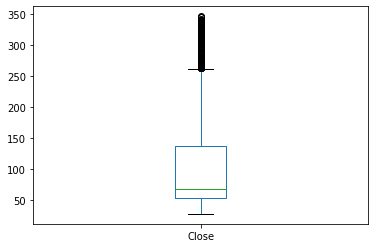

In [71]:
tw2330['Close'].plot(kind = 'box')

### 箱型圖
- 比較數據
- 找出離群值

In [82]:
import numpy as np
np.random.seed(42)
np.random.randint(1,42, 6)

array([39, 29, 15,  8, 21, 39])

In [0]:
import numpy as np
np.random.seed(42)
temp = pandas.Series(np.random.randint(1,40, 100))

In [89]:
temp.mean()

19.43

In [90]:
temp.median()

20.5

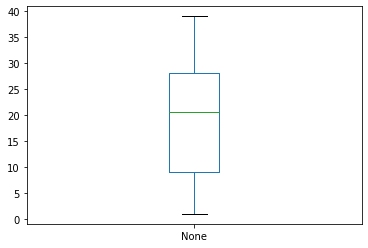

In [91]:
temp.plot(kind = 'box')

In [0]:
temp2 = temp.append(pandas.Series([999,999,999]))

In [98]:
temp2.mean()

47.96116504854369

In [99]:
temp2.median()

21.0

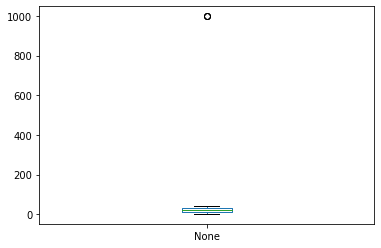

In [100]:
temp2.plot(kind = 'box')

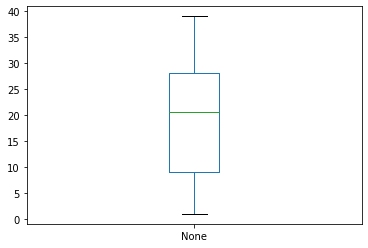

In [102]:
temp2[temp2 < 100].plot(kind = 'box')

In [0]:
import pandas
rent591 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col = 0)

In [104]:
rent591.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


In [0]:
rent591['price'] = rent591['price'].map(lambda e: int(e.replace('元/月', '').replace(',', '')))

In [0]:
rent591['city'] = rent591['address'].str.extract('(.+?[市縣]).+')

In [0]:
rent591['price_per_area'] = rent591['price'] / rent591['building_area']

In [110]:
rent591[['city', 'price_per_area']].head()

,city,price_per_area
0,高雄市,750.000000
1,新北市,750.000000
2,新北市,1375.000000
3,屏東縣,625.000000
4,桃園市,714.285714


In [0]:
sample_591 = rent591[['city', 'price_per_area']]
sample_591 = sample_591[sample_591['city'].isin(['台北市', '屏東縣'])]

###  Matplotlib 在 Win10 下顯現中文
- https://daxpowerbi.com/%E5%A6%82%E4%BD%95%E5%9C%A8win-10%E8%A7%A3%E6%B1%BAmatplotlib%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E7%9A%84%E5%95%8F%E9%A1%8C/

- 下載文字
https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

- 解壓縮以後將otf 放置於C:\Users\User\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf 以下

- 清除C:\Users\User.matplotlib 所以的檔案

- 重啟 jupyter notebook kernel

In [118]:
! wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2020-05-16 03:30:16--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c15::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  53.0MB/s    in 2.2s    

2020-05-16 03:30:19 (53.0 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]



In [119]:
! unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.otf  
  inflating: NotoSansMonoCJKtc-Bold.otf  
  inflating: NotoSansMonoCJKtc-Regular.otf  
  inflating: README                  


In [0]:
!mv NotoSansCJKtc-Regular.otf /usr/share/fonts/truetype/

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf'
fontprop = fm.FontProperties(fname=path)

In [0]:
sample_591['log_price_per_area'] = np.log(sample_591['price_per_area'])

([<matplotlib.axis.XTick at 0x7fb332a61518>,
 [Text(0, 0, '台北市'), Text(0, 0, '屏東縣')])

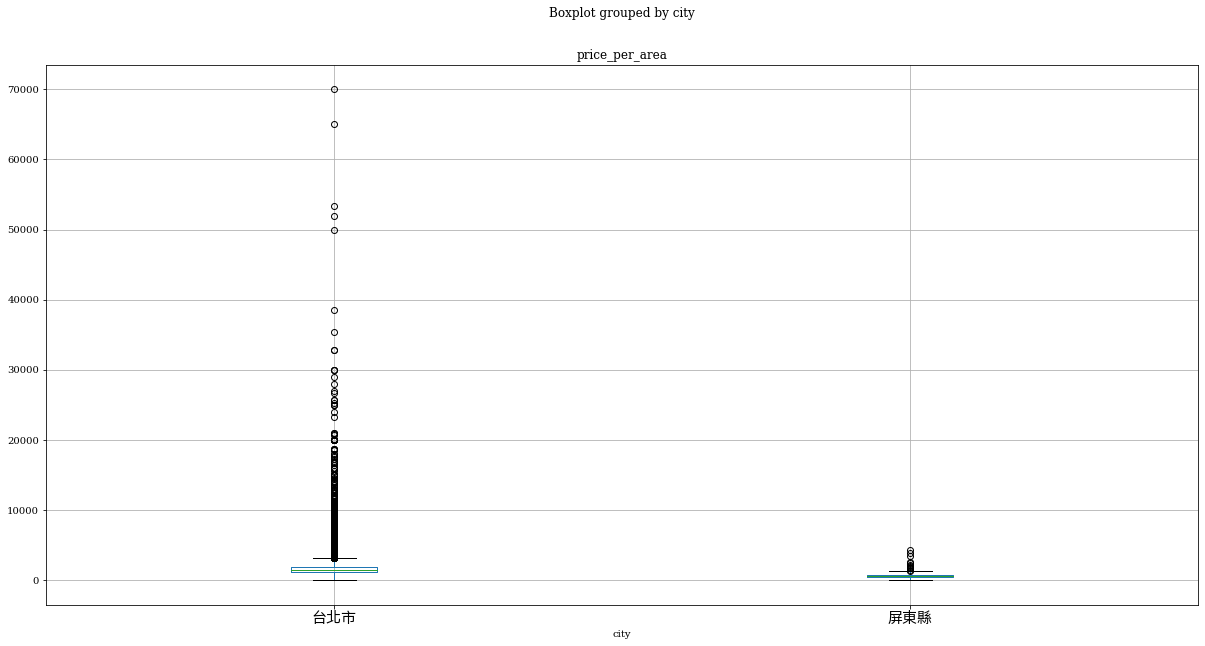

In [137]:
import matplotlib.pyplot as plt
import numpy as np

sample_591.boxplot('price_per_area', by= 'city', figsize = [20,10])
plt.xticks( (1,2),('台北市','屏東縣') ,fontproperties=fontprop)

In [144]:
a = np.array([1,10,100,1000])
np.log10(a)

array([0., 1., 2., 3.])

([<matplotlib.axis.XTick at 0x7fb3329da438>,
 [Text(0, 0, '台北市'), Text(0, 0, '屏東縣')])

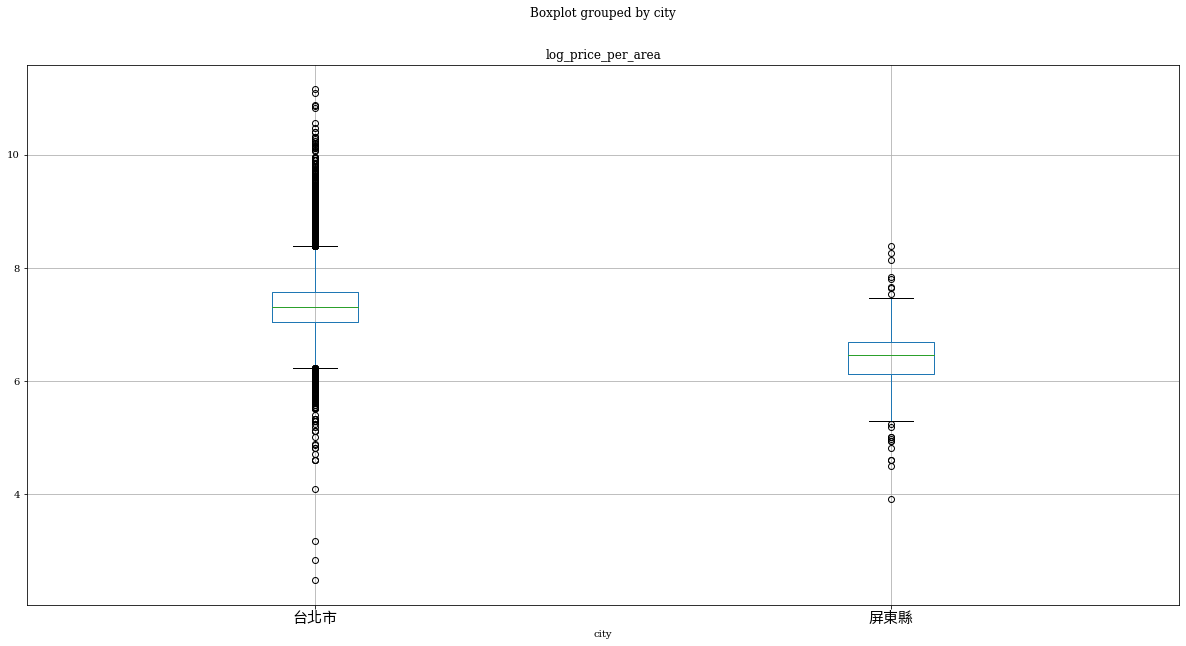

In [138]:
import matplotlib.pyplot as plt
import numpy as np
sample_591.boxplot('log_price_per_area', by= 'city', figsize = [20,10])
plt.xticks( (1,2),('台北市','屏東縣') ,fontproperties=fontprop)

###直方圖

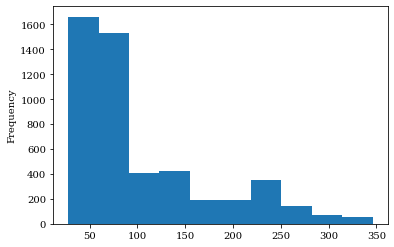

In [145]:
tw2330['Close'].plot(kind = 'hist')

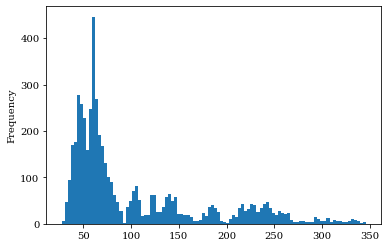

In [146]:
tw2330['Close'].plot(kind = 'hist', bins = 100)

In [148]:
tw2330['Close'].var()

5166.154466900455

In [149]:
np.sqrt(tw2330['Close'].var())

71.87596585020931

In [150]:
tw2330['Close'].std()

71.87596585020931

In [151]:
tw2330['Close'].pct_change(1).head()

Date
2000-01-04         NaN
2000-01-05    0.022471
2000-01-06   -0.021977
2000-01-07   -0.028091
2000-01-10    0.034682
Name: Close, dtype: float64

In [154]:
tw2330['Close'].shift(1).head()

Date
2000-01-04          NaN
2000-01-05    69.649002
2000-01-06    71.214104
2000-01-07    69.649002
2000-01-10    67.692497
Name: Close, dtype: float64

In [157]:
tw2330['Close'].head()

Date
2000-01-04    69.649002
2000-01-05    71.214104
2000-01-06    69.649002
2000-01-07    67.692497
2000-01-10    70.040199
Name: Close, dtype: float64

In [156]:
(tw2330['Close'] / tw2330['Close'].shift(1) - 1).head()

Date
2000-01-04         NaN
2000-01-05    0.022471
2000-01-06   -0.021977
2000-01-07   -0.028091
2000-01-10    0.034682
Name: Close, dtype: float64

In [0]:
tw2330['DailyReturn']  = tw2330['Close'].pct_change(1)

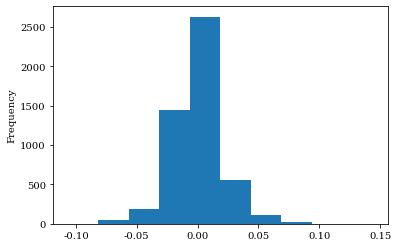

In [159]:
tw2330['DailyReturn'].plot(kind ='hist')

In [160]:
tw2330['DailyReturn'].mean()

0.000492728963195317

In [161]:
tw2330['DailyReturn'].std()

0.020167180788670438

In [0]:
stocks = DataReader(['2330.TW', '2498.TW'], data_source = 'yahoo', start = '2014-01-01')['Close']

In [166]:
stocks.head()

Symbols,2330.TW,2498.TW
Date,,
2014-01-02,104.5,138.5
2014-01-03,102.5,138.5
2014-01-06,102.5,133.5
2014-01-07,102.0,131.0
2014-01-08,104.0,130.0


In [0]:
ret = stocks.pct_change(1)

In [168]:
ret.head()

Symbols,2330.TW,2498.TW
Date,,
2014-01-02,NaN,NaN
2014-01-03,-0.019139,0.000000
2014-01-06,0.000000,-0.036101
2014-01-07,-0.004878,-0.018727
2014-01-08,0.019608,-0.007634


In [169]:
ret.mean()

Symbols
2330.TW    0.000788
2498.TW   -0.000642
dtype: float64

In [170]:
ret.std()

Symbols
2330.TW    0.014993
2498.TW    0.027606
dtype: float64